In [1]:
import pickle

In [2]:
import os

In [3]:
CWD=os.getcwd()
FOLDER='New Twitter data'

In [4]:
df = pickle.load(open( os.path.join(CWD,FOLDER,'Twitter_Phrases.pkl'), "rb" ) )

In [5]:
df

,tweet,label,year,original,docs_phrases,Dominant
0,perfect owners,Electric,2015,#MyFord #Mobile Is a #SmartWatch #App Perfect ...,"[perfect, owner]",Topic 6
1,exclusive video gms path plans highlights,Electric,2015,#solar Exclusive Video On GM’s Electric Vehicl...,"[exclusive, video, gms, path, plan, highlight]",Topic 5
2,hong kong announcement worlds biggest rally su...,Electric,2015,@harbourtimes Hong Kong announcement - 2016 wo...,"[hong, kong, announcement, world_big, rally, s...",Topic 5
3,exclusive video gms path plans highlights,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...","[exclusive, video, gms, path, plan, highlight]",Topic 5
4,exclusive video gms path plans highlights orig...,Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...","[exclusive, video, gms, path, plan, highlight,...",Topic 5
...,...,...,...,...,...,...
99480,projected barrel oil electrichybrid makers com...,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are elec...,"[project, barrel, oil, maker, communicate, ben...",Topic 2
99481,affordable also fuel efficient c epaestimated mpg,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,"[affordable, fuel, efficient, mpg]",Topic 6
99482,affordable also fuel efficient c epaestimated mpg,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,"[affordable, fuel, efficient, mpg]",Topic 6
99483,kick models technology including mondeo,Hybrid,2015,"To kick off 2015, we're looking at all the new...","[kick, model, technology, include, mondeo]",Topic 1


In [7]:
df['tweet']=df['original']

In [9]:
df.drop(['docs_phrases'], axis=1, inplace=True)

# data pre-processing

In [11]:
# remove hashtag and username
df.loc[:, 'tweet'] = df['tweet'].str.replace('#[^\s]+', '')
df.loc[:, 'tweet'] = df['tweet'].str.replace('@[^\s]+', '')

In [12]:
# remove returns
df.loc[:, 'tweet'] = df['tweet'].str.replace('\n', '')

# remove urls
df.loc[:, 'tweet'] = df['tweet'].str.replace(r"http\S+", '')
df.loc[:, 'tweet'] = df['tweet'].str.replace(r"[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)", '')

In [14]:
df.dropna(inplace=True)

In [15]:
df

,tweet,label,year,original,Dominant
0,Is a Perfect for Electric Vehicle Owners ...,Electric,2015,#MyFord #Mobile Is a #SmartWatch #App Perfect ...,Topic 6
1,Exclusive Video On GM’s Electric Vehicle Path...,Electric,2015,#solar Exclusive Video On GM’s Electric Vehicl...,Topic 5
2,Hong Kong announcement - 2016 world’s biggest...,Electric,2015,@harbourtimes Hong Kong announcement - 2016 wo...,Topic 5
3,"Exclusive Video On GM’s Electric Vehicle Path,...",Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...",Topic 5
4,"Exclusive Video On GM’s Electric Vehicle Path,...",Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...",Topic 5
...,...,...,...,...,...
99480,Projected $40/Barrel Oil in 2015. How are elec...,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are elec...,Topic 2
99481,Toyota's most affordable hybrid vehicle is als...,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,Topic 6
99482,Toyota's most affordable hybrid vehicle is als...,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,Topic 6
99483,"To kick off 2015, we're looking at all the new...",Hybrid,2015,"To kick off 2015, we're looking at all the new...",Topic 1


# setup

In [16]:
# utilities
from time import time
from collections import defaultdict
import re
import logging
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s",
                    datefmt= '%H:%M:%S', level=logging.INFO)
# nlp pipeline
import spacy

In [17]:
def cleaning(_string):
    '''
    : argument: string
    : return  : string
    '''
    # purge non alpha characters
    alpha = re.sub("[^A-Za-z']+", ' ', str(_string))
    return alpha.lower()

                   
# --+ get clean text
docs = [cleaning(item) for item in df.tweet.values]

In [50]:
df

,tweet,label,year,original,Dominant,tkn_text,phrased_text
0,Is a Perfect for Electric Vehicle Owners ...,Electric,2015,#MyFord #Mobile Is a #SmartWatch #App Perfect ...,Topic 6,"[perfect, electric, vehicle, owner]","[perfect, electric, vehicle, owner]"
1,Exclusive Video On GM’s Electric Vehicle Path...,Electric,2015,#solar Exclusive Video On GM’s Electric Vehicl...,Topic 5,"[exclusive, video, gm, electric, vehicle, path...","[exclusive, video, gm, electric, vehicle, path..."
2,Hong Kong announcement - 2016 world’s biggest...,Electric,2015,@harbourtimes Hong Kong announcement - 2016 wo...,Topic 5,"[hong, kong, announcement, world, big, electri...","[hong, kong, announcement, world, big, electri..."
3,"Exclusive Video On GM’s Electric Vehicle Path,...",Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...",Topic 5,"[exclusive, video, gm, electric, vehicle, path...","[exclusive, video, gm, electric, vehicle, path..."
4,"Exclusive Video On GM’s Electric Vehicle Path,...",Electric,2015,"Exclusive Video On GM’s Electric Vehicle Path,...",Topic 5,"[exclusive, video, gm, electric, vehicle, path...","[exclusive, video, gm, electric, vehicle, path..."
...,...,...,...,...,...,...,...
99480,Projected $40/Barrel Oil in 2015. How are elec...,Hybrid,2015,Projected $40/Barrel Oil in 2015. How are elec...,Topic 2,"[project, barrel, oil, electric, hybrid, vehic...","[project, barrel, oil, electric, hybrid, vehic..."
99481,Toyota's most affordable hybrid vehicle is als...,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,Topic 6,"[toyota, affordable, hybrid, vehicle, fuel, ef...","[toyota, affordable, hybrid, vehicle, fuel_eff..."
99482,Toyota's most affordable hybrid vehicle is als...,Hybrid,2015,Toyota's most affordable hybrid vehicle is als...,Topic 6,"[toyota, affordable, hybrid, vehicle, fuel, ef...","[toyota, affordable, hybrid, vehicle, fuel_eff..."
99483,"To kick off 2015, we're looking at all the new...",Hybrid,2015,"To kick off 2015, we're looking at all the new...",Topic 1,"[kick, look, new, model, ford, technology, inc...","[kick, look, new, model, ford, technology, inc..."


In [18]:
import en_core_web_lg

In [19]:
nlp = en_core_web_lg.load()

In [20]:
# load pipeline
nlp = spacy.load('en_core_web_lg', disable=['ner', 'parser', 'tagger'])

In [21]:
# tokenized text
docs_tokens = []

for doc in docs:
    tmp_tokens = [token.lemma_ for token in nlp(doc) 
                  if not token.is_stop
                  and not token.is_space
                  and not token.is_punct
                  and not token.is_oov
                  and len(token.lemma_) > 1]
    docs_tokens.append(tmp_tokens)
    tmp_tokens = []

In [22]:
# --+ let's store the tokenized text
# df.loc[:, 'tkn_text'] = docs_tokens

# get bigrammed-sentences

In [23]:
# load some gensim 
from gensim.models.phrases import Phrases, Phraser

INFO - 22:13:20: 'pattern' package not found; tag filters are not available for English


In [24]:
phrases = Phrases(docs, min_count=30, progress_per=10000)

INFO - 22:13:21: collecting all words and their counts
INFO - 22:13:21: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 22:13:22: PROGRESS: at sentence #10000, processed 742919 words and 804 word types
INFO - 22:13:23: PROGRESS: at sentence #20000, processed 1479901 words and 805 word types
INFO - 22:13:25: PROGRESS: at sentence #30000, processed 2538321 words and 807 word types
INFO - 22:13:28: PROGRESS: at sentence #40000, processed 3826262 words and 809 word types
INFO - 22:13:31: PROGRESS: at sentence #50000, processed 5265246 words and 810 word types
INFO - 22:13:34: PROGRESS: at sentence #60000, processed 6563173 words and 810 word types
INFO - 22:13:35: PROGRESS: at sentence #70000, processed 7455877 words and 810 word types
INFO - 22:13:37: PROGRESS: at sentence #80000, processed 8227072 words and 810 word types
INFO - 22:13:39: PROGRESS: at sentence #90000, processed 9376192 words and 810 word types
INFO - 22:13:41: collected 810 word types from a corpus of

In [25]:
# --+ get rid of common terms
common_terms = [u'of', u'with', u'without', u'and', u'or', u'the', u'a',
                u'not', 'be', u'to', u'this', u'who', u'in']

# --+ fing phrases as bigrams
bigram = Phrases(docs_tokens,
                 min_count=50,
                 # max_vocab_size=50000,
                 common_terms=common_terms)

# --+ manipulate docs
docs_phrased = [bigram[line] for line in docs_tokens]

INFO - 22:13:42: collecting all words and their counts
INFO - 22:13:42: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 22:13:42: PROGRESS: at sentence #10000, processed 78289 words and 26327 word types
INFO - 22:13:42: PROGRESS: at sentence #20000, processed 156237 words and 45430 word types
INFO - 22:13:42: PROGRESS: at sentence #30000, processed 262339 words and 83074 word types
INFO - 22:13:43: PROGRESS: at sentence #40000, processed 385441 words and 135749 word types
INFO - 22:13:44: PROGRESS: at sentence #50000, processed 520465 words and 194500 word types
INFO - 22:13:44: PROGRESS: at sentence #60000, processed 646323 words and 236722 word types
INFO - 22:13:45: PROGRESS: at sentence #70000, processed 738530 words and 259891 word types
INFO - 22:13:45: PROGRESS: at sentence #80000, processed 822060 words and 279207 word types
INFO - 22:13:45: PROGRESS: at sentence #90000, processed 935913 words and 318586 word types
INFO - 22:13:46: collected 343117 word type

In [48]:
# --+ let's store the tokenized text
df.loc[:, 'phrased_text'] = docs_phrased

# split by year

In [75]:
docs_phrased2015 = [i for i in df.loc[df['year']==2015]['phrased_text']]
docs_phrased2016 = [i for i in df.loc[df['year']==2016]['phrased_text']]
docs_phrased2017 = [i for i in df.loc[df['year']==2017]['phrased_text']]
docs_phrased2018 = [i for i in df.loc[df['year']==2018]['phrased_text']]
docs_phrased2019 = [i for i in df.loc[df['year']==2019]['phrased_text']]

# implement the word2vec with gensim

In [27]:
# let's try to speed things up a little bit
import multiprocessing
cores = multiprocessing.cpu_count()
# load gensim implementation of the word2vec
from gensim.models import Word2Vec

### Setup the params

In [102]:
###############################################################################
'''
Fixing the params requires significant knowledge about the corpus of text at
hand and the cultural and societal context for the corpus
'''
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     seed=1, workers=1)

### Build the vocabulary

In [103]:

##############################
w2v_model.build_vocab(docs_phrased, progress_per=10000)



INFO - 23:37:29: collecting all words and their counts
INFO - 23:37:29: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 23:37:29: PROGRESS: at sentence #10000, processed 73268 words, keeping 5558 word types
INFO - 23:37:29: PROGRESS: at sentence #20000, processed 144342 words, keeping 7859 word types
INFO - 23:37:29: PROGRESS: at sentence #30000, processed 244157 words, keeping 11279 word types
INFO - 23:37:29: PROGRESS: at sentence #40000, processed 362065 words, keeping 14896 word types
INFO - 23:37:29: PROGRESS: at sentence #50000, processed 493342 words, keeping 17807 word types
INFO - 23:37:29: PROGRESS: at sentence #60000, processed 612398 words, keeping 20173 word types
INFO - 23:37:30: PROGRESS: at sentence #70000, processed 699619 words, keeping 21620 word types
INFO - 23:37:30: PROGRESS: at sentence #80000, processed 777148 words, keeping 22946 word types
INFO - 23:37:30: PROGRESS: at sentence #90000, processed 886787 words, keeping 24866 word types
I

### Train the model

In [104]:
#########################
w2v_model.train(docs_phrased, total_examples=w2v_model.corpus_count,
                epochs=30, report_delay=1)

INFO - 23:37:35: training model with 1 workers on 4111 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2
INFO - 23:37:36: EPOCH 1 - PROGRESS: at 35.85% examples, 119792 words/s, in_qsize 1, out_qsize 0
INFO - 23:37:37: EPOCH 1 - PROGRESS: at 56.73% examples, 111187 words/s, in_qsize 1, out_qsize 0
INFO - 23:37:38: EPOCH 1 - PROGRESS: at 88.37% examples, 110046 words/s, in_qsize 1, out_qsize 0
INFO - 23:37:39: EPOCH 1 - PROGRESS: at 100.00% examples, 93646 words/s, in_qsize 0, out_qsize 1
INFO - 23:37:39: worker thread finished; awaiting finish of 0 more threads
INFO - 23:37:39: EPOCH - 1 : training on 973761 raw words (382838 effective words) took 4.1s, 93490 effective words/s
INFO - 23:37:40: EPOCH 2 - PROGRESS: at 11.00% examples, 28342 words/s, in_qsize 1, out_qsize 0
INFO - 23:37:41: EPOCH 2 - PROGRESS: at 23.83% examples, 33220 words/s, in_qsize 2, out_qsize 0
INFO - 23:37:42: EPOCH 2 - PROGRESS: at 36.67% examples, 40928 words/s, in_qsize 1, out_qsize

INFO - 23:38:40: EPOCH 14 - PROGRESS: at 58.28% examples, 115397 words/s, in_qsize 2, out_qsize 0
INFO - 23:38:41: EPOCH 14 - PROGRESS: at 89.13% examples, 112086 words/s, in_qsize 2, out_qsize 0
INFO - 23:38:41: worker thread finished; awaiting finish of 0 more threads
INFO - 23:38:41: EPOCH - 14 : training on 973761 raw words (382592 effective words) took 3.4s, 111431 effective words/s
INFO - 23:38:42: EPOCH 15 - PROGRESS: at 22.71% examples, 62848 words/s, in_qsize 1, out_qsize 0
INFO - 23:38:43: EPOCH 15 - PROGRESS: at 38.36% examples, 66275 words/s, in_qsize 1, out_qsize 0
INFO - 23:38:44: EPOCH 15 - PROGRESS: at 51.46% examples, 67175 words/s, in_qsize 2, out_qsize 0
INFO - 23:38:45: EPOCH 15 - PROGRESS: at 73.03% examples, 70384 words/s, in_qsize 1, out_qsize 0
INFO - 23:38:46: EPOCH 15 - PROGRESS: at 95.61% examples, 72895 words/s, in_qsize 2, out_qsize 0
INFO - 23:38:46: worker thread finished; awaiting finish of 0 more threads
INFO - 23:38:46: EPOCH - 15 : training on 973761 

INFO - 23:39:46: EPOCH - 28 : training on 973761 raw words (383504 effective words) took 4.9s, 78306 effective words/s
INFO - 23:39:47: EPOCH 29 - PROGRESS: at 31.61% examples, 100869 words/s, in_qsize 1, out_qsize 0
INFO - 23:39:48: EPOCH 29 - PROGRESS: at 55.09% examples, 108920 words/s, in_qsize 1, out_qsize 0
INFO - 23:39:49: EPOCH 29 - PROGRESS: at 77.03% examples, 97391 words/s, in_qsize 1, out_qsize 0
INFO - 23:39:50: worker thread finished; awaiting finish of 0 more threads
INFO - 23:39:50: EPOCH - 29 : training on 973761 raw words (383283 effective words) took 4.0s, 96201 effective words/s
INFO - 23:39:51: EPOCH 30 - PROGRESS: at 29.77% examples, 92237 words/s, in_qsize 1, out_qsize 0
INFO - 23:39:52: EPOCH 30 - PROGRESS: at 53.23% examples, 105600 words/s, in_qsize 1, out_qsize 0
INFO - 23:39:53: EPOCH 30 - PROGRESS: at 79.46% examples, 100235 words/s, in_qsize 1, out_qsize 0
INFO - 23:39:54: EPOCH 30 - PROGRESS: at 98.21% examples, 93341 words/s, in_qsize 1, out_qsize 0
INFO

(11497517, 29212830)

# Explore the model

## Do vectors make any sense?

In [61]:
items = ['hybrid', 'electric', 'ev']

for item in items:
    try:
        positives = w2v_model.wv.most_similar(positive=[item])
        print("""
        
        Lexical item is `{}'
        ======================================================
         term                 similarity
        ------------------------------------------------------
        """.format(item))
        for term, similarity in positives:
            print('\t', term.ljust(15), '\t', np.round(similarity, 3), flush=True)
    except:
        print("""
        
        Lexical item is `{}'
        ======================================================
        
        
        !!! ...too bad, item not in dictionary !!!
        
        """.format(item))



        
        Lexical item is `hybrid'
         term                 similarity
        ------------------------------------------------------
        
	 car             	 0.553
	 prius           	 0.282
	 af              	 0.271
	 ans             	 0.264
	 aqua            	 0.264
	 phev            	 0.26
	 new_post        	 0.258
	 rage            	 0.248
	 toyota          	 0.246
	 toyota_prius    	 0.245

        
        Lexical item is `electric'
         term                 similarity
        ------------------------------------------------------
        
	 vehicle         	 0.406
	 ev              	 0.404
	 cnet            	 0.332
	 novice          	 0.31
	 motor_announce  	 0.288
	 plan            	 0.283
	 facilitate      	 0.275
	 ars_technica    	 0.271
	 deployment      	 0.27
	 track           	 0.265

        
        Lexical item is `ev'
         term                 similarity
        ------------------------------------------------------
        
	 electric       

## Closer characters?

In [42]:
characters = ['hybrid', 'electric']

In [43]:
print("""        
Inter-lexical item similarity
======================================================
  pair                             similarity
------------------------------------------------------
""")

for c_i in characters:
    for c_j in characters:
        if c_i != c_j:
            sim_cicj = w2v_model.wv.similarity(c_i, c_j)
            print("""""",
                  '{} - {}'.format(c_i, c_j).ljust(30),
                  '{}'.format(sim_cicj))
        else:
            pass

        
Inter-lexical item similarity
  pair                             similarity
------------------------------------------------------

 hybrid - electric              -0.07088255882263184
 electric - hybrid              -0.07088255882263184


In [117]:
###
w2v_model2015 = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     seed=1, workers=1)
#          ##                         ##
w2v_model2015.build_vocab(docs_phrased2015, progress_per=10000)

##       ##                  ##                           ##
w2v_model2015.train(docs_phrased2015, total_examples=w2v_model2015.corpus_count,
                epochs=30, report_delay=1)

INFO - 23:50:47: collecting all words and their counts
INFO - 23:50:47: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 23:50:47: PROGRESS: at sentence #10000, processed 73792 words, keeping 5911 word types
INFO - 23:50:47: collected 8490 word types from a corpus of 129280 raw words and 17079 sentences
INFO - 23:50:47: Loading a fresh vocabulary
INFO - 23:50:47: effective_min_count=20 retains 941 unique words (11% of original 8490, drops 7549)
INFO - 23:50:47: effective_min_count=20 leaves 104441 word corpus (80% of original 129280, drops 24839)
INFO - 23:50:47: deleting the raw counts dictionary of 8490 items
INFO - 23:50:47: sample=6e-05 downsamples 941 most-common words
INFO - 23:50:47: downsampling leaves estimated 24899 word corpus (23.8% of prior 104441)
INFO - 23:50:47: estimated required memory for 941 words and 300 dimensions: 2728900 bytes
INFO - 23:50:47: resetting layer weights
INFO - 23:50:47: training model with 1 workers on 941 vocabulary and 300

(746696, 3878400)

# store the result

In [96]:
#2019
sim_2019 = w2v_model.wv.similarity('hybrid', 'electric')
sim_2019

0.15895611

In [116]:
#2019
sim_2019 = w2v_model2019.wv.similarity('hybrid', 'electric')
sim_2019

0.15868296

In [92]:
#2018
sim_2018 = w2v_model.wv.similarity('hybrid', 'electric')
sim_2018

0.21634841

In [114]:
#2018
sim_2018 = w2v_model2018.wv.similarity('hybrid', 'electric')
sim_2018

0.18664798

In [88]:
#2017
sim_2017 = w2v_model.wv.similarity('hybrid', 'electric')
sim_2017

0.2345172

In [112]:
#2017
sim_2017 = w2v_model2017.wv.similarity('hybrid', 'electric')
sim_2017

0.18647859

In [84]:
#2016
sim_2016 = w2v_model.wv.similarity('hybrid', 'electric')
sim_2016

-0.21172394

In [110]:
#2016
sim_2016 = w2v_model2016.wv.similarity('hybrid', 'electric')
sim_2016

-0.2081947

In [119]:
#2015
sim_2015 = w2v_model2015.wv.similarity('hybrid', 'electric')
sim_2015

0.08747892

In [109]:
#2015
sim_2015 = w2v_model2015.wv.similarity('hybrid', 'electric')
sim_2015

0.08747892

In [59]:
#overall
sim_overall = w2v_model.wv.similarity('hybrid', 'electric')
sim_overall

-0.07088256

In [105]:
#overall
sim_test = w2v_model.wv.similarity('hybrid', 'electric')
sim_test

-0.07405798

# plot

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


In [121]:
year=['Overall',2015,2016,2017,2018,2019]

In [157]:
sim=[-0.071,0.087,-0.208,0.186,0.187,0.159]

In [158]:
df_plot=pd.DataFrame({'label':year,'similarity':sim})

In [159]:
df_plot

,label,similarity
0,Overall,-0.071
1,2015,0.087
2,2016,-0.208
3,2017,0.186
4,2018,0.187
5,2019,0.159


In [190]:
c_1=plt.cm.get_cmap('tab10')(1)
c_2=plt.cm.get_cmap('tab10')(0)

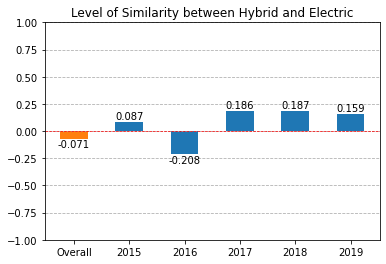

In [195]:
fig, ax = plt.subplots(figsize=(6,4))

bar_plot = plt.bar(x=[0, 1, 2, 3, 4, 5],
                   height=df_plot.similarity.values.tolist(),
                   data=df_plot,
                   width=.5,
                   tick_label=year,
                   color=[c_1,c_2,c_2,c_2,c_2,c_2])


ax.set_title('Level of Similarity between Hybrid and Electric',
             fontdict=dict(size=12))
#ax.set_xlabel('Topic')
#ax.set_ylabel('Average Weights(%)')

# grid
ax.grid(True,axis='y', ls='--')

# reference line
ax.axhline( y=0,ls="--",color="red",linewidth=0.7)


bar_label = df_plot.similarity.values.tolist()

plt.ylim(-1, 1)


def autolabel(rects):
    for idx, rect in enumerate(bar_plot):
        height = rect.get_height()
        if height>0:
            ax.text(rect.get_x() + rect.get_width() / 2.,
                1.05 * height,
                bar_label[idx],
                ha='center',
                va='bottom',
                rotation=0)
        else:
            ax.text(rect.get_x() + rect.get_width() / 2.,
            1.05 * height,
            bar_label[idx],
            ha='center',
            va='top',
            rotation=0)
            


autolabel(bar_plot)

plt.savefig('Similarity64.pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)
plt.show()

In [196]:
w2v_model['hybrid']

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.26285353,  0.29224837, -0.3217703 ,  0.23382588,  0.3423997 ,
       -0.19915313,  0.45463613,  0.19657205, -0.4147094 ,  0.3397364 ,
       -0.4676935 , -0.26713923,  0.41173902,  0.05282113, -0.06697675,
       -0.13577084,  0.05224013,  0.6069899 , -0.11792807,  0.36473587,
        0.2086238 , -0.19973665,  0.11779333, -0.16686559, -0.49483112,
        0.3567665 , -0.02799941, -0.16077857,  0.40854988,  0.088838  ,
       -0.22995092,  0.01189337,  0.43516156, -0.03633916, -0.08069453,
       -0.1785701 ,  0.1426521 ,  0.00306699,  0.0159362 ,  0.06512081,
       -0.05309048,  0.0862512 ,  0.21488312,  0.25097704,  0.14127009,
        0.18774058, -0.07465655, -0.01800725,  0.3260477 ,  0.15244344,
       -0.08687267,  0.03025587, -0.04395971, -0.18586159,  0.08551728,
       -0.22130525, -0.23495401,  0.03418488, -0.07390089, -0.05678153,
        0.13598013, -0.13698423, -0.03965495,  0.11112392,  0.21105455,
        0.02034722,  0.24391615, -0.28721878,  0.09831403,  0.13

In [197]:
w2v_model['electric']

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.03592358, -0.18397458, -0.04713145,  0.47179678,  0.20052938,
       -0.04018774,  0.30360115,  0.3292805 , -0.1992667 , -0.19160594,
       -0.00220537,  0.56817216, -0.13962436,  0.03738423, -0.33631086,
        0.40666005, -0.29595602, -0.2897487 , -0.03811299,  0.04209531,
       -0.11027315, -0.08113853,  0.1419533 ,  0.12502608,  0.08593385,
       -0.01335818, -0.27385637, -0.08444131, -0.08751336,  0.26976374,
        0.01543709, -0.01233954,  0.0560229 ,  0.01837171, -0.06442425,
        0.12623684,  0.10978495, -0.41647047, -0.0665739 , -0.00760091,
        0.11699233, -0.10330258,  0.09652563,  0.10880841, -0.2652454 ,
       -0.1625433 , -0.12639883,  0.03433451, -0.40936205,  0.13858043,
       -0.13090083, -0.16545063, -0.03185921, -0.22125956,  0.1258937 ,
       -0.10052616, -0.08884344, -0.08695153,  0.20908588, -0.02727928,
        0.43493873, -0.03611684,  0.13124245,  0.2690188 ,  0.04565503,
       -0.26416317,  0.13068183,  0.05672444,  0.15310928, -0.11

In [199]:
print(w2v_model2015['hybrid'],
w2v_model2015['electric'])

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[-0.01356191 -0.02827392  0.17146793  0.00758553  0.13079906  0.19204265
  0.13056566 -0.06946516 -0.02740493 -0.41040266 -0.26495242  0.17044097
 -0.02114746 -0.01063795  0.07078057 -0.08061524 -0.06198794  0.20834026
  0.19740064 -0.00600727  0.0038416   0.02067785  0.02336756 -0.1532106
 -0.13855262 -0.1221999  -0.17107072  0.08178256 -0.14565085 -0.04768481
  0.00221492 -0.03869429 -0.02959222 -0.28352687  0.16191283 -0.04320623
 -0.17191082  0.01921806 -0.17780621 -0.05761936  0.10990572 -0.08247159
 -0.07303859 -0.06659503  0.09550124  0.05610394 -0.02751065  0.07379197
  0.05455833  0.19106163 -0.14088653  0.01363785 -0.12560369 -0.01557236
  0.14611773  0.20368008 -0.0291382   0.03656586 -0.12277623 -0.05044591
  0.17544165  0.01926721 -0.18917836 -0.10509381  0.07127793 -0.22824077
 -0.15977909  0.09841803  0.02765787  0.23031844 -0.009523   -0.02144638
  0.07640731  0.10867704 -0.02279152  0.02208633 -0.22096255  0.0839164
  0.17391948  0.04437415 -0.08905394  0.07394045  0.0

 -1.30836084e-01 -2.56647795e-01  2.54826576e-01 -5.22134453e-02]


In [200]:
print(w2v_model2016['hybrid'],
      w2v_model2016['electric'])

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[ 3.85875888e-02 -6.29374087e-02  2.92818099e-01 -2.46329457e-01
  7.50472918e-02 -2.90837109e-01  1.58123255e-01 -4.70494747e-01
 -1.92893948e-02  2.74373125e-02  5.23814820e-02 -1.68119028e-01
  1.24741711e-01  8.92618671e-02  3.52590114e-01 -2.58347780e-01
  2.40678012e-01  2.57976562e-01 -1.58900008e-01  2.75569886e-01
  2.58799158e-02 -1.29931733e-01 -2.29911685e-01  7.17225522e-02
 -2.06030130e-01  3.67539525e-02  1.78952575e-01  9.48122218e-02
  3.87600541e-01  2.51014620e-01 -4.11723137e-01  8.49637948e-03
  1.94200575e-01 -3.47905606e-01  3.28007042e-01  1.15274154e-01
  5.75541183e-02 -2.42990721e-02 -5.05310774e-01  1.78275090e-02
 -8.41205269e-02 -5.57033308e-02 -2.31343910e-01  8.03395361e-02
  2.13688500e-02 -2.59271443e-01 -9.95014086e-02  6.84301138e-01
  3.54159683e-01  1.37907505e-01  6.23424761e-02 -2.08776385e-01
  2.27169171e-02  1.44789293e-01 -1.44677222e-01  1.65199980e-01
  5.17283985e-03 -1.52623832e-01  2.45874573e-04 -2.51913249e-01
 -2.05302760e-01 -1.10403

  0.00484306  0.28854355 -0.2788125  -0.1418445   0.41467384 -0.2212726 ]


In [201]:
print(w2v_model2017['hybrid'],
      w2v_model2017['electric'])

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[-9.87899974e-02 -8.31728801e-02  3.45133655e-02  2.22605705e-01
  1.16258793e-01  1.64216459e-01  2.17561121e-03 -1.67485788e-01
 -6.62504137e-02  3.66166010e-02 -2.04107955e-01 -1.66007094e-02
 -1.57883033e-01  3.87538970e-02  9.09689665e-02  6.53154403e-02
 -1.64468940e-02  1.84709102e-01 -9.46310386e-02  2.59372443e-01
 -4.39755142e-01 -9.77898482e-03  1.14553414e-01  1.69352829e-01
 -4.13398147e-02 -1.02946803e-01 -1.10529363e-01 -1.84749961e-02
 -9.98910293e-02  1.90072693e-03 -2.42843688e-01  2.34052584e-01
  1.55090630e-01 -1.72611862e-01  1.79459244e-01  6.25385577e-03
 -1.20935157e-01  7.45670199e-02  6.30140826e-02 -7.19738007e-02
 -1.74271241e-02  1.01597860e-01 -1.73866153e-01  9.97160599e-02
  1.11925051e-01 -3.81466508e-01 -7.99725354e-02  3.91680934e-02
  5.63466474e-02  6.34294972e-02 -2.92356491e-01 -1.19603634e-01
 -1.51181400e-01  2.56318375e-02  6.00333288e-02 -3.65302637e-02
 -3.32774490e-01 -5.74222431e-02  1.31947443e-01  1.46881506e-01
  1.00729980e-01  8.06516

 -2.21969277e-01 -2.34645084e-01  6.68905750e-02 -1.02968395e-01]


In [202]:
print(w2v_model2018['hybrid'],
      w2v_model2018['electric'])

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[-4.65744827e-03  1.49326548e-02  5.66835031e-02  2.06183687e-01
 -1.39742225e-01  9.36219990e-02 -7.98809156e-02 -1.40269861e-01
  7.01585412e-02  2.03547850e-01 -7.21495599e-05  4.65857312e-02
 -7.22325295e-02 -3.08148235e-01 -1.02712419e-02  5.31546213e-02
 -1.00148164e-01  5.01100495e-02 -1.59478456e-01  2.34652326e-01
 -1.27792299e-01 -9.94726121e-02  2.42814004e-01  2.15357333e-01
 -3.35657984e-01 -3.84835117e-02  1.60957381e-01 -1.46639675e-01
 -1.59773067e-01  7.03457221e-02 -2.66680777e-01  2.73123771e-01
  1.53553367e-01  5.46738468e-02  6.01401702e-02  2.15517119e-01
 -1.72128513e-01  8.92447904e-02 -5.23876436e-02  1.59939870e-01
 -1.98582917e-01 -9.57851112e-03  2.48502251e-02  2.34549977e-02
 -3.84744839e-03  8.18330050e-03 -2.40209877e-01 -1.87064141e-01
  2.61189014e-01  1.28667071e-01 -7.06855208e-02 -1.09333590e-01
 -7.80701339e-02 -4.81499620e-02  1.56526044e-01  4.53134812e-02
 -1.28775910e-01 -1.85185045e-01  1.91482343e-02  4.00005244e-02
 -3.68871726e-02  1.16011

  5.58631159e-02 -3.89799863e-01  2.04989418e-01 -1.61285978e-02]


In [203]:
print(w2v_model2019['hybrid'],
      w2v_model2019['electric'])

D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
D:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[-0.12359803 -0.1024261   0.06726361  0.04364371  0.328388    0.10900038
  0.3614366   0.00432044  0.01018124 -0.00737608  0.08632887  0.2369713
  0.31349516 -0.04404012 -0.23833887 -0.10591563 -0.18976931  0.38951772
  0.21765238  0.03111386  0.07394838  0.12616166 -0.0597899   0.0498929
 -0.34385887  0.31358674 -0.0708558  -0.16913986 -0.12153689 -0.07840179
 -0.14548485 -0.29636315  0.34440395  0.06239301 -0.01359152 -0.17904289
 -0.14373536 -0.15682249  0.07007237  0.24978833  0.2790177   0.11159226
 -0.23315895  0.30788228 -0.08289116  0.28882137 -0.19556819  0.17379001
  0.1326691   0.25272894 -0.1475634   0.25703052 -0.33358538 -0.03490456
 -0.42965454  0.15611334 -0.16096514  0.37517434 -0.27764395  0.02749926
  0.28202194  0.1958081   0.31935593 -0.2439352   0.02562155 -0.16086717
  0.33315852 -0.12988144  0.08808415 -0.05536029  0.30413616  0.10351858
 -0.2663319  -0.08476031  0.21232867  0.34935686 -0.26346645  0.15886106
  0.0835249  -0.02087349 -0.36094218  0.00323507 -0.5

  3.05311289e-03 -1.40041202e-01  2.09143221e-01 -5.57054169e-02]


# plot

In [3]:
from sklearn.decomposition import PCA

In [5]:
hybrid=[ 0.26285353,  0.29224837, -0.3217703 ,  0.23382588,  0.3423997 ,
       -0.19915313,  0.45463613,  0.19657205, -0.4147094 ,  0.3397364 ,
       -0.4676935 , -0.26713923,  0.41173902,  0.05282113, -0.06697675,
       -0.13577084,  0.05224013,  0.6069899 , -0.11792807,  0.36473587,
        0.2086238 , -0.19973665,  0.11779333, -0.16686559, -0.49483112,
        0.3567665 , -0.02799941, -0.16077857,  0.40854988,  0.088838  ,
       -0.22995092,  0.01189337,  0.43516156, -0.03633916, -0.08069453,
       -0.1785701 ,  0.1426521 ,  0.00306699,  0.0159362 ,  0.06512081,
       -0.05309048,  0.0862512 ,  0.21488312,  0.25097704,  0.14127009,
        0.18774058, -0.07465655, -0.01800725,  0.3260477 ,  0.15244344,
       -0.08687267,  0.03025587, -0.04395971, -0.18586159,  0.08551728,
       -0.22130525, -0.23495401,  0.03418488, -0.07390089, -0.05678153,
        0.13598013, -0.13698423, -0.03965495,  0.11112392,  0.21105455,
        0.02034722,  0.24391615, -0.28721878,  0.09831403,  0.13019058,
       -0.02740021,  0.37163538,  0.11740688, -0.19927797, -0.12224477,
        0.15967976,  0.19773886,  0.19003677, -0.22213046, -0.04478471,
        0.13020481, -0.02860797, -0.33745354, -0.10570466,  0.31893647,
       -0.17283133, -0.6211185 ,  0.01343987,  0.42258748,  0.01363997,
       -0.29233733,  0.1374005 ,  0.01339601, -0.13363872, -0.24251696,
        0.05435875, -0.23837751, -0.25868213,  0.20181212,  0.3052121 ,
       -0.1424281 , -0.48219118, -0.45944142,  0.34685043,  0.31673142,
       -0.17289987, -0.19155483, -0.36092025,  0.11851136,  0.16645323,
        0.24754228, -0.05499788,  0.405339  ,  0.03807057, -0.12862761,
        0.39484748, -0.03735583, -0.22945215,  0.6631669 ,  0.03214832,
        0.4261344 ,  0.09336088,  0.04861101, -0.05854401,  0.1427223 ,
        0.04501177, -0.53186136, -0.43085012, -0.14987983, -0.2280006 ,
       -0.03179392, -0.07236883,  0.3956167 , -0.1449337 , -0.15903845,
       -0.10411502,  0.02559223,  0.11590704, -0.19719821, -0.09952932,
        0.25843826,  0.33261454, -0.12408228,  0.15446222,  0.01077219,
       -0.26607332,  0.24625608, -0.3265089 ,  0.04525331,  0.43520328,
       -0.06411954,  0.09717246,  0.09264672, -0.05769975,  0.33523726,
        0.03126295,  0.15681958,  0.15097412, -0.0535096 , -0.05437718,
       -0.51766366, -0.09434037,  0.17197326,  0.14673598, -0.14532436,
       -0.13728929, -0.14711682,  0.12629668, -0.2688484 ,  0.34775853,
       -0.3049164 ,  0.22310556,  0.2587945 ,  0.07990313,  0.12840001,
        0.15209757,  0.18393734, -0.06420466, -0.04103649,  0.07547604,
       -0.18857339,  0.04525029,  0.19729285,  0.14387406,  0.27592   ,
        0.16453473, -0.15909402, -0.07056698,  0.33893448,  0.09055871,
       -0.44909224,  0.17272249, -0.00495394, -0.07218109,  0.21391515,
        0.24492525, -0.04369092, -0.08489371, -0.08803509, -0.11547215,
       -0.01311125, -0.1668508 , -0.2307405 ,  0.15834631, -0.2759895 ,
       -0.04759758, -0.20086126, -0.13492417, -0.02528221, -0.37985814,
        0.28493127,  0.21290855,  0.4865118 , -0.15395483,  0.29268938,
        0.0969289 , -0.00284168, -0.40391612, -0.08864354, -0.0785172 ,
       -0.34279057, -0.11454751,  0.10449875,  0.10536812, -0.2909094 ,
       -0.67045397,  0.16679348,  0.10718717, -0.41893995, -0.22115742,
       -0.01621133,  0.05936392, -0.31899223, -0.24713843,  0.3673036 ,
        0.34694463,  0.28485155, -0.17395678, -0.1902776 ,  0.4045424 ,
       -0.28046256, -0.15452908, -0.23597617, -0.1572371 ,  0.32217935,
       -0.2725113 ,  0.03004621,  0.14065064, -0.17941366, -0.04520813,
       -0.19858469, -0.14588854, -0.4414316 , -0.33943442,  0.07637325,
        0.60388106, -0.01949055, -0.02220998,  0.538079  , -0.0524946 ,
       -0.5092162 , -0.08533547, -0.42739713, -0.04295663,  0.49118719,
        0.26476097, -0.54766136,  0.07622519,  0.02507301, -0.11556681,
        0.38661835,  0.11261765,  0.23606096,  0.11455493,  0.44951752,
        0.11370867,  0.23659272,  0.24002157,  0.04229506,  0.185617  ,
        0.4504851 , -0.15164015,  0.05067288, -0.04432407,  0.22912578,
        0.46277633,  0.20886758,  0.23356147, -0.1690124 ,  0.00310898,
       -0.24912836,  0.21233985, -0.21329306, -0.13755402, -0.47236383,
       -0.17137602, -0.10135191,  0.18339776,  0.11906958,  0.30441922]

In [4]:
electric=[-0.03592358, -0.18397458, -0.04713145,  0.47179678,  0.20052938,
       -0.04018774,  0.30360115,  0.3292805 , -0.1992667 , -0.19160594,
       -0.00220537,  0.56817216, -0.13962436,  0.03738423, -0.33631086,
        0.40666005, -0.29595602, -0.2897487 , -0.03811299,  0.04209531,
       -0.11027315, -0.08113853,  0.1419533 ,  0.12502608,  0.08593385,
       -0.01335818, -0.27385637, -0.08444131, -0.08751336,  0.26976374,
        0.01543709, -0.01233954,  0.0560229 ,  0.01837171, -0.06442425,
        0.12623684,  0.10978495, -0.41647047, -0.0665739 , -0.00760091,
        0.11699233, -0.10330258,  0.09652563,  0.10880841, -0.2652454 ,
       -0.1625433 , -0.12639883,  0.03433451, -0.40936205,  0.13858043,
       -0.13090083, -0.16545063, -0.03185921, -0.22125956,  0.1258937 ,
       -0.10052616, -0.08884344, -0.08695153,  0.20908588, -0.02727928,
        0.43493873, -0.03611684,  0.13124245,  0.2690188 ,  0.04565503,
       -0.26416317,  0.13068183,  0.05672444,  0.15310928, -0.11772659,
        0.18291219,  0.2959679 , -0.146421  ,  0.12230749, -0.04210344,
       -0.00721465,  0.2613882 , -0.00956166,  0.32355392,  0.04586143,
        0.09787305,  0.2891234 ,  0.12107114,  0.1372053 , -0.03298495,
        0.08722255,  0.1399495 ,  0.15563276,  0.00752876, -0.11231707,
       -0.0757645 , -0.48168847, -0.8461399 ,  0.01926094,  0.06638718,
        0.70693594, -0.27264914, -0.10845838, -0.06803995,  0.00865566,
       -0.19327335, -0.13473499,  0.00180523,  0.09359632, -0.18878077,
        0.06329892, -0.10565224,  0.01108129,  0.2593603 , -0.04339594,
       -0.08034335, -0.25675994,  0.04256913,  0.22314997,  0.31054097,
        0.25774172, -0.07819666,  0.18016961, -0.03174494,  0.01878328,
       -0.15349603, -0.0340778 ,  0.0240814 ,  0.03246493,  0.00143944,
       -0.02490941,  0.3485598 ,  0.36694732,  0.373228  , -0.0075489 ,
       -0.08719588,  0.07473908,  0.05170151, -0.08513073,  0.48092023,
        0.06117438,  0.04163793,  0.24956094,  0.19853805, -0.11568831,
       -0.13710815, -0.1750197 , -0.2856432 ,  0.24444981,  0.13111198,
        0.27819487, -0.3400409 , -0.28732476,  0.1766119 , -0.3525759 ,
       -0.10602987,  0.09292581,  0.38560897,  0.34875208,  0.17914267,
        0.48605236, -0.06609904, -0.17067645, -0.11329203,  0.15743744,
        0.4027924 , -0.0894538 , -0.01624261,  0.29856485, -0.2047772 ,
        0.01125826,  0.03565498, -0.01456983,  0.07788697, -0.11310151,
        0.6416981 , -0.10141136, -0.36579376,  0.15273406,  0.20250182,
       -0.00107545,  0.10385647, -0.2964546 ,  0.02730287, -0.10622624,
        0.02945478, -0.12776527, -0.01918014,  0.21324314,  0.05493847,
        0.03015731,  0.12057941, -0.02371522, -0.15164371, -0.04930935,
       -0.0336739 ,  0.18256119,  0.28234076, -0.06396082,  0.15488721,
        0.1997409 , -0.351926  , -0.2194882 , -0.09770138,  0.1542342 ,
       -0.30257046,  0.22824341, -0.23018774, -0.22157934, -0.37977743,
       -0.10289312, -0.10085994, -0.0800261 , -0.08922911,  0.28097364,
       -0.18608204,  0.30889094,  0.3739988 , -0.12490774,  0.44155997,
       -0.27366063, -0.49004516,  0.3009292 , -0.23664072,  0.17513758,
        0.2524912 , -0.6083658 ,  0.14326438,  0.3090411 ,  0.03951058,
        0.02047481, -0.03409391, -0.00890299,  0.19901553, -0.06016139,
       -0.12109691, -0.02186882, -0.01125329,  0.00436899, -0.04363814,
       -0.19366425,  0.20187785,  0.10592016, -0.04586   , -0.17517668,
        0.23782182, -0.08190858, -0.07867654,  0.06538893,  0.16319783,
        0.18160623,  0.32781836, -0.01185287, -0.12892064, -0.48708433,
        0.48302424, -0.3644765 ,  0.15831777,  0.00370221,  0.22029327,
       -0.16095836, -0.25763214, -0.14305587,  0.03950792, -0.08131284,
        0.07427404, -0.30046442, -0.18557326,  0.27277476,  0.07081544,
        0.36484432,  0.19394313,  0.04948923,  0.4358119 ,  0.19211109,
        0.13516699,  0.06871212,  0.02624549, -0.36681443, -0.13886242,
       -0.10111348, -0.22043405, -0.01897811,  0.4257416 ,  0.40464774,
       -0.2255249 , -0.3404876 , -0.5747382 ,  0.20824888, -0.07863583,
       -0.2059475 ,  0.0604836 , -0.10185666, -0.13513534,  0.0156901 ,
       -0.08048906, -0.08977084, -0.21434128, -0.29770714, -0.04372666,
       -0.2821905 ,  0.13959226,  0.04872221, -0.10538325, -0.354368  ]

In [6]:
hybrid=np.array(hybrid)

In [8]:
elctric=np.array(electric)

In [9]:
word_vectors = np.array([hybrid,electric])

In [ ]:
twodim = PCA().fit_transform(word_vectors)[:,:2]

plt.figure(figsize=(6,6))
plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')

twodim = PCA().fit_transform(word_vectors)[:,:2]

plt.figure(figsize=(1,1))
plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')

words=['Hybrid','Electric']

for word, (x,y) in zip(words, twodim):
    plt.text(x+0.05, y+0.05, word)

In [12]:
twodim

array([[ 2.93996212e+00,  1.97162358e-16],
       [-2.93996212e+00,  1.97162358e-16]])

In [17]:
from sklearn.manifold import TSNE

In [18]:
dim=pd.DataFrame(twodim)

In [22]:
dim.index=['Hybrid','Electric']
dim.columns=['x','y']

In [23]:
dim

,x,y
Hybrid,2.939962,1.971624e-16
Electric,-2.939962,1.971624e-16


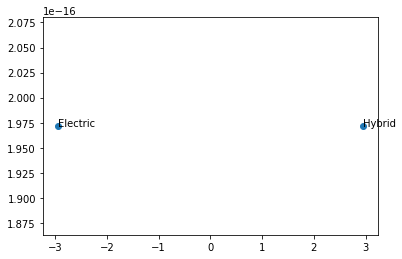

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for word, pos in dim.iterrows():
    ax.annotate(word, pos)

ax.scatter(dim['x'], dim['y'])

In [26]:
for word, pos in dim.iterrows():
    ax.annotate(word, pos)

In [28]:
labels = ['Hybrid','Electric']
tokens = [hybrid,electric]

In [76]:
tokens = [hybrid,electric]

In [47]:
twodim

array([[ 2.93996212e+00,  1.97162358e-16],
       [-2.93996212e+00,  1.97162358e-16]])

In [79]:
new_values

array([[-4.2871964e+02,  3.7252903e-08],
       [ 4.2871964e+02,  3.7252903e-08]], dtype=float32)

In [100]:
from math import log 


In [106]:
log(y[0],10)

-7.428839878591473

In [107]:
y=[log(i,10) for i in y]

In [131]:
x

[-428.71964, 428.71964]

In [132]:
y

[3.7252903e-08, 3.7252903e-08]

In [142]:
labels = ['Hybrid','Electric']

In [108]:
y

[-7.428839878591473, -7.428839878591473]

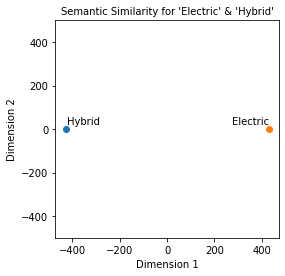

In [143]:

    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    #y=[log(i,10) for i in y]
        
    plt.figure(figsize=(4, 4)) 

    plt.scatter(x[0],y[0])
    plt.annotate(labels[0],
                     xy=(x[0], y[0]),
                     xytext=(1, 3),
                     textcoords='offset points',
                     ha='left',
                     va='bottom')
    
    plt.scatter(x[1],y[1])
    plt.annotate(labels[1],
                     xy=(x[1], y[1]),
                     xytext=(1, 3),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        
        
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
#plt.title("Semantic Similarity for 'Electric' & 'Hybrid'",size=10)
    

plt.ylim(-500,500)
    
#plt.grid()

#plt.xticks([])
#plt.yticks([])

#plt.vlines(x[0], -7.85, y[0])
#plt.hlines(y, xmin, xmax)

#plt.vlines(0,0,0.5)

plt.savefig('similarity44.pdf',
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)

# plt.axhline(y=3.7252903e-08, c='r', ls='--', lw=2)
# plt.axvline(x=428.71964, c='g', ls='-.', lw=2)

        
    plt.show()

pca=PCA(n_components=2)
>>> newData=pca.fit_transform(data)


In [ ]:
Axes3D.scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)

In [ ]:
import

In [ ]:
sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)